In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle
import seaborn as sns
import csv
import pandas as pd
import scipy.stats as stats
rng_seed = 42

---

<h1><center>SDSE Final Project (Group 11) <br><br> 3. Linear Regression  </center></h1>

---

After this demo, you will be able to understand:
1. Understand how the dataset is cleaned/organized for machine learning algorithms (Linear Regression)
2. Training/Testing Data and Identifying Trends
3. Compare the Predicted vs Actual from the Linear Regression Results

## 1) Load the Data 
+ Load the data file `Salary Data.csv` into a Pandas dataframe using [`pd.read_csv`]

In [115]:
df = pd.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


## 2) Data Cleaning
+ Perform the same data cleaning process but in one box of code.
    + Contains removing null values and classifying releveant objects as binary, multiclass values.  

In [116]:
education_map = []
for value in df.loc[:, 'Education Level']:
    if value == "Bachelor's":
        education_map.append(0)
    elif value == "Master's":
        education_map.append(1)
    elif value == "PhD":
        education_map.append(2)
    else:
        education_map.append(-1)

gender_map = []
for value in df.loc[:, 'Gender']:
    if value == "Female":
        gender_map.append(0)
    elif value == "Male":
        gender_map.append(1)
    else:
        gender_map.append(-1)

df['Education Level'] = education_map
df['Gender'] = gender_map

df = df.drop(df[df['Education Level'] == -1].index)
df = df.drop(df[df['Gender'] == -1].index)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,Software Engineer,5.0,90000.0
1,28.0,0,1,Data Analyst,3.0,65000.0
2,45.0,1,2,Senior Manager,15.0,150000.0
3,36.0,0,0,Sales Associate,7.0,60000.0
4,52.0,1,1,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0,0,Senior Marketing Analyst,8.0,85000.0
371,43.0,1,1,Director of Operations,19.0,170000.0
372,29.0,0,0,Junior Project Manager,2.0,40000.0
373,34.0,1,0,Senior Operations Coordinator,7.0,90000.0


## 3) Find Relationship between Age and Salary 
+ Use the .plot function to construct the scatterplot

<Axes: title={'center': 'Scatterplot of Age vs Salary ($)'}, xlabel='Age', ylabel='Salary'>

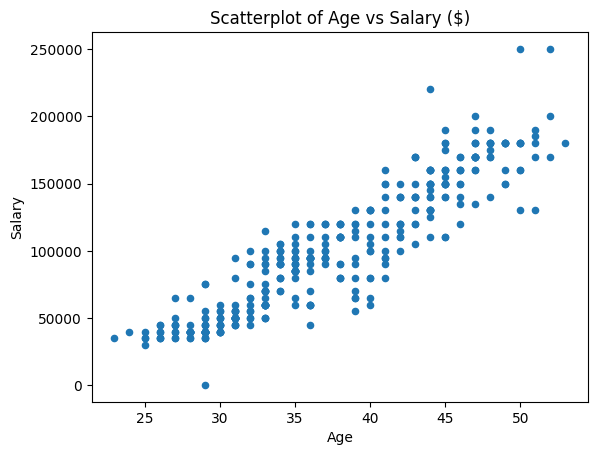

In [117]:
df.plot(kind='scatter',x='Age',y='Salary', title = 'Scatterplot of Age vs Salary ($)') 

## 4) Find Relationship between Years of Experience and Salary 
+ Use the .plot function to construct the scatterplot

<Axes: title={'center': 'Scatterplot of Years of Experience vs Salary ($)'}, xlabel='Years of Experience', ylabel='Salary'>

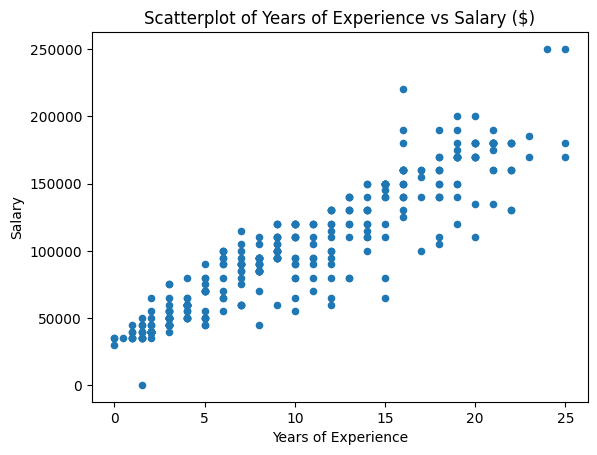

In [118]:
df.plot(kind='scatter',x='Years of Experience',y='Salary', title = 'Scatterplot of Years of Experience vs Salary ($)') 

## 5) Joint Plot of Age and Salary
+ Use the .jointplot function to construct a joint plot and analyze marginal distributions

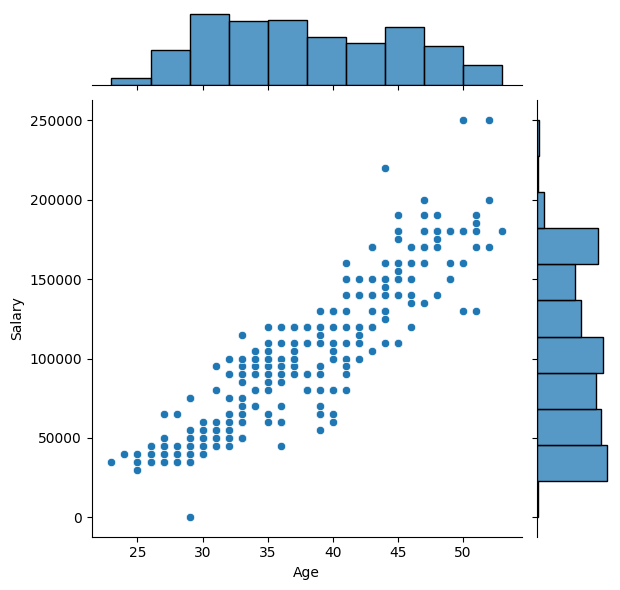

In [119]:
X=df['Age'].values
Y=df['Salary'].values
sns.jointplot(x='Age',y='Salary', data=df)

## 6) Joint Plot of Years of Experience and Salary
+ Use the .jointplot function to construct a joint plot and analyze marginal distributions

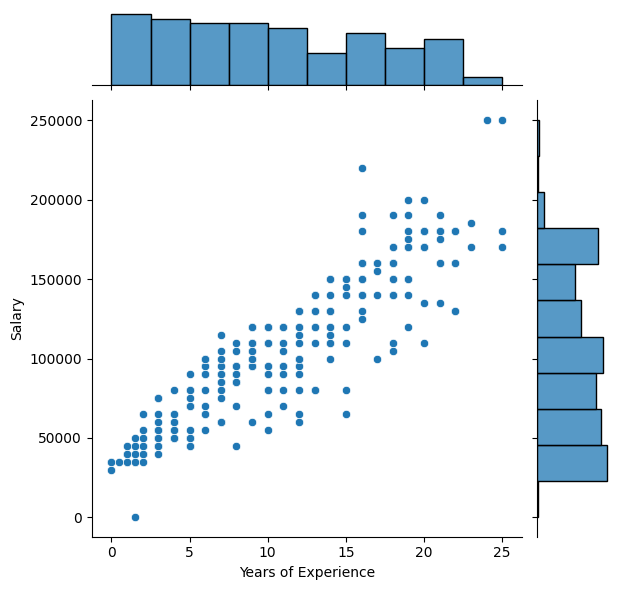

In [120]:
sns.jointplot(x='Years of Experience',y='Salary', data=df)

## 7) Linear Regression of Age and Salary & Years of Experience and Salary
+ Use the .lmplot function to construct a joint plot and observe where the best fit of line is

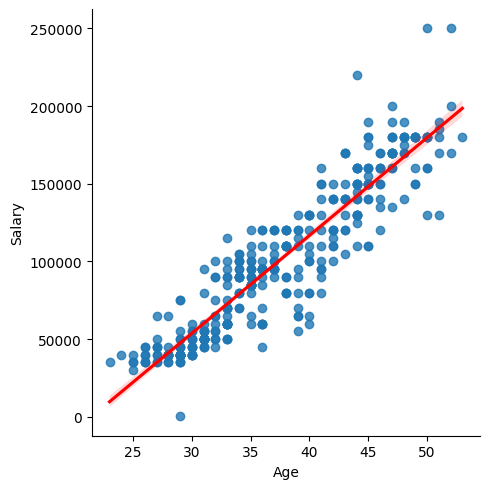

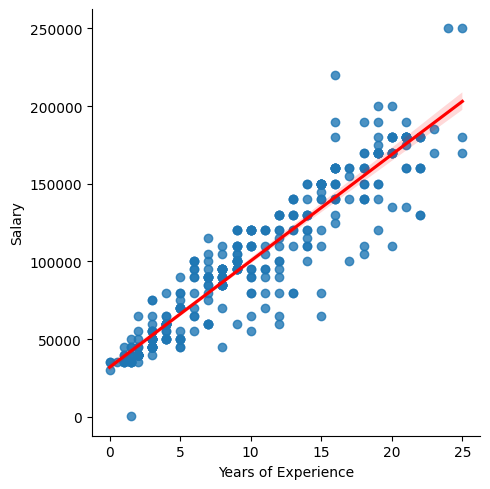

In [121]:
sns.lmplot(x = 'Age', y = 'Salary', data = df, line_kws={'color': 'red'})
sns.lmplot(x = 'Years of Experience', y = 'Salary', data = df, line_kws={'color': 'red'})

## 6) Training and Testing Data
+ Set number of features to 2, for 'Age' and 'Years of Experience'
+ Y is the 'Salary'

In [122]:
X =df[['Age','Years of Experience']]
X.head()

,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0


## 7) Extract the test dataset and train the dataset
+ Split df into training and testing parts. Keep 80% for training and 20% for testing. Always pass `random_state=rng_seed` to `train_test_split` so that the result is repeatable.

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=rng_seed)

In [124]:
# Train the machine learning model on the given dataset
from sklearn.linear_model import LinearRegression

linearreg = LinearRegression()
linearreg.fit(X_train,Y_train) 

LinearRegression(copy_X = True, fit_intercept = True)

print(linearreg.coef_)

[2657.46419442 4008.06199409]


## 8) Comparison of Predicted vs Actual Salary
+ Includes relevant metric for Linear Regression: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE)

Text(0, 0.5, 'Salary Actual ($)')

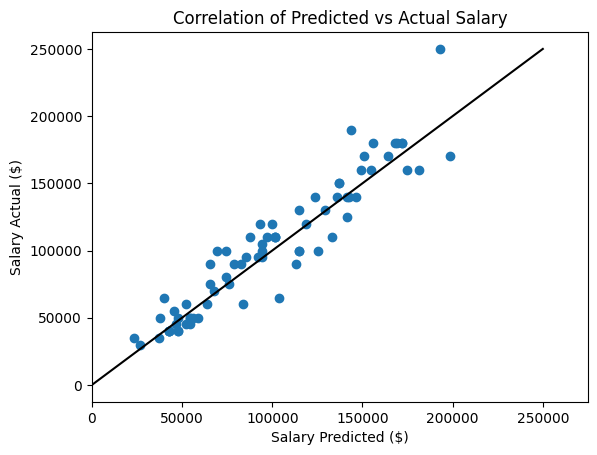

In [125]:
prediction = linearreg.predict(X_test)
plt.scatter(prediction,Y_test)
plt.xlim(0, 275000)
plt.plot(np.linspace(0, 250000), np.linspace(0, 250000), color = 'black')
plt.title('Correlation of Predicted vs Actual Salary')
plt.xlabel('Salary Predicted ($)')
plt.ylabel('Salary Actual ($)')

In [126]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(Y_test,prediction) )
print('MSE: ', metrics.mean_squared_error(Y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))
print('MAPE: ', metrics.mean_absolute_percentage_error(Y_test,prediction))

MAE:  12358.463998978064
MSE:  267299022.86077455
RMSE: 16349.282028908014
MAPE:  0.12990783417535376
